In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

# Import the requests library.
import requests
# Import the API key.
from config import weather_api_key

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
from citipy import citipy

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

611

In [6]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [7]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | karaton
Processing Record 2 of Set 1 | subtanjalla
Processing Record 3 of Set 1 | estelle
Processing Record 4 of Set 1 | temozon
Processing Record 5 of Set 1 | butaritari
Processing Record 6 of Set 1 | lyngdal
Processing Record 7 of Set 1 | dikson
Processing Record 8 of Set 1 | barrow
Processing Record 9 of Set 1 | mount gambier
Processing Record 10 of Set 1 | leningradskiy
Processing Record 11 of Set 1 | hobart
Processing Record 12 of Set 1 | punta arenas
Processing Record 13 of Set 1 | pisco
Processing Record 14 of Set 1 | hermanus
Processing Record 15 of Set 1 | banda aceh
Processing Record 16 of Set 1 | hilo
Processing Record 17 of Set 1 | tsihombe
City not found. Skipping...
Processing Record 18 of Set 1 | pyu
Processing Record 19 of Set 1 | mar del plata
Processing Record 20 of Set 1 | avarua
Processing Record 21 of Set 1 | itoman
Processing Record 22 of Set 1 | hvide sande
Processing Recor

Processing Record 40 of Set 4 | ugoofaaru
Processing Record 41 of Set 4 | bubaque
Processing Record 42 of Set 4 | trincomalee
Processing Record 43 of Set 4 | davlekanovo
Processing Record 44 of Set 4 | sur
Processing Record 45 of Set 4 | marzuq
Processing Record 46 of Set 4 | turinsk
Processing Record 47 of Set 4 | qidong
Processing Record 48 of Set 4 | salinopolis
Processing Record 49 of Set 4 | neiba
Processing Record 50 of Set 4 | inverell
Processing Record 1 of Set 5 | walvis bay
Processing Record 2 of Set 5 | tuktoyaktuk
Processing Record 3 of Set 5 | laguna
Processing Record 4 of Set 5 | broken hill
Processing Record 5 of Set 5 | boca raton
Processing Record 6 of Set 5 | sabha
Processing Record 7 of Set 5 | kavaratti
Processing Record 8 of Set 5 | necochea
Processing Record 9 of Set 5 | chincha alta
Processing Record 10 of Set 5 | yulara
Processing Record 11 of Set 5 | kattivakkam
Processing Record 12 of Set 5 | grand centre
City not found. Skipping...
Processing Record 13 of Set

Processing Record 26 of Set 8 | havelock
Processing Record 27 of Set 8 | kirakira
Processing Record 28 of Set 8 | durban
Processing Record 29 of Set 8 | storozhevaya
Processing Record 30 of Set 8 | sao benedito do rio preto
Processing Record 31 of Set 8 | berlevag
Processing Record 32 of Set 8 | surt
Processing Record 33 of Set 8 | aykhal
Processing Record 34 of Set 8 | peniche
Processing Record 35 of Set 8 | doume
Processing Record 36 of Set 8 | talnakh
Processing Record 37 of Set 8 | port augusta
Processing Record 38 of Set 8 | byron bay
Processing Record 39 of Set 8 | airai
Processing Record 40 of Set 8 | sidi ali
Processing Record 41 of Set 8 | san pedro
Processing Record 42 of Set 8 | santa cruz de tenerife
Processing Record 43 of Set 8 | padina
Processing Record 44 of Set 8 | kaitangata
Processing Record 45 of Set 8 | gatton
Processing Record 46 of Set 8 | andenes
Processing Record 47 of Set 8 | corner brook
Processing Record 48 of Set 8 | dingle
Processing Record 49 of Set 8 | b

Processing Record 10 of Set 12 | makakilo city
Processing Record 11 of Set 12 | teacapan
Processing Record 12 of Set 12 | vila do maio
Processing Record 13 of Set 12 | egvekinot
Processing Record 14 of Set 12 | evensk
Processing Record 15 of Set 12 | garissa
Processing Record 16 of Set 12 | novobirilyussy
Processing Record 17 of Set 12 | glomfjord
Processing Record 18 of Set 12 | jalu
Processing Record 19 of Set 12 | seka
Processing Record 20 of Set 12 | riverton
Processing Record 21 of Set 12 | shelekhov
Processing Record 22 of Set 12 | nalut
Processing Record 23 of Set 12 | arua
Processing Record 24 of Set 12 | mocuba
Processing Record 25 of Set 12 | tura
Processing Record 26 of Set 12 | teya
Processing Record 27 of Set 12 | riyadh
Processing Record 28 of Set 12 | tual
Processing Record 29 of Set 12 | sapao
City not found. Skipping...
Processing Record 30 of Set 12 | plettenberg bay
Processing Record 31 of Set 12 | yuki
Processing Record 32 of Set 12 | gaillac
Processing Record 33 of

In [8]:
len(city_data)

558

In [9]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Karaton,-6.3424,106.1045,75.22,92,99,3.33,ID,2022-05-07 14:30:14
1,Subtanjalla,-14.0189,-75.7581,71.08,65,28,4.61,PE,2022-05-07 14:30:14
2,Estelle,29.8458,-90.1067,80.01,68,20,3.44,US,2022-05-07 14:30:15
3,Temozon,20.8000,-88.2167,82.49,52,76,5.79,MX,2022-05-07 14:30:15
4,Butaritari,3.0707,172.7902,81.55,77,96,10.92,KI,2022-05-07 14:30:16
5,Lyngdal,58.1376,7.0700,51.89,67,22,20.69,NO,2022-05-07 14:30:16
6,Dikson,73.5069,80.5464,11.07,98,36,5.68,RU,2022-05-07 14:30:17
7,Barrow,71.2906,-156.7887,21.22,93,100,12.66,US,2022-05-07 14:30:17
8,Mount Gambier,-37.8333,140.7667,49.91,93,100,5.75,AU,2022-05-07 14:30:18
9,Leningradskiy,69.3833,178.4167,18.05,97,98,1.90,RU,2022-05-07 14:30:18


In [10]:
# Reorder the columns
new_column_order =["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Karaton,ID,2022-05-07 14:30:14,-6.3424,106.1045,75.22,92,99,3.33
1,Subtanjalla,PE,2022-05-07 14:30:14,-14.0189,-75.7581,71.08,65,28,4.61
2,Estelle,US,2022-05-07 14:30:15,29.8458,-90.1067,80.01,68,20,3.44
3,Temozon,MX,2022-05-07 14:30:15,20.8000,-88.2167,82.49,52,76,5.79
4,Butaritari,KI,2022-05-07 14:30:16,3.0707,172.7902,81.55,77,96,10.92
5,Lyngdal,NO,2022-05-07 14:30:16,58.1376,7.0700,51.89,67,22,20.69
6,Dikson,RU,2022-05-07 14:30:17,73.5069,80.5464,11.07,98,36,5.68
7,Barrow,US,2022-05-07 14:30:17,71.2906,-156.7887,21.22,93,100,12.66
8,Mount Gambier,AU,2022-05-07 14:30:18,-37.8333,140.7667,49.91,93,100,5.75
9,Leningradskiy,RU,2022-05-07 14:30:18,69.3833,178.4167,18.05,97,98,1.90


In [11]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

## Plot Latitude vs. Temperature

In [12]:
# Get Data for Plotting
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [15]:
# Import the time module.
import time
# Get today's date in seconds.
# today = time.time()
today = time.strftime("%x")
today

'05/07/22'

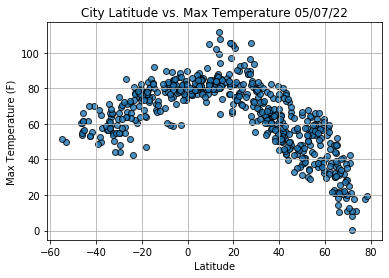

In [14]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

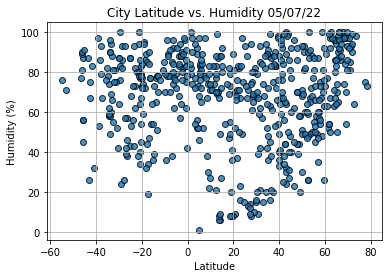

In [16]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

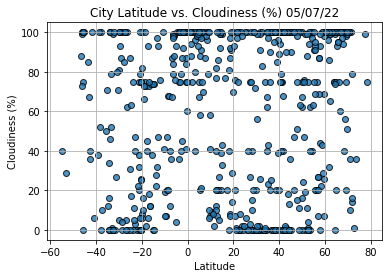

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

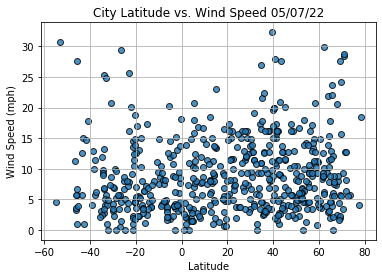

In [18]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

# Create a linear regression

In [19]:
# Import linregress
from scipy.stats import linregress

In [21]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [22]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

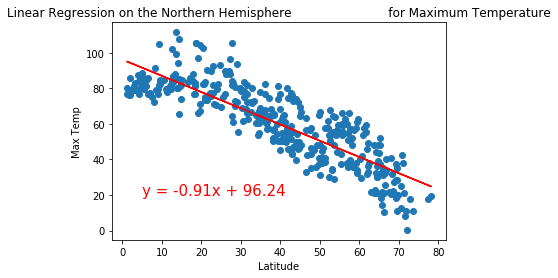

In [69]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(5,20))
# If the equation for the regression line doesn't show up on your graph, 
# you can change the text_coordinates until you see the equation.

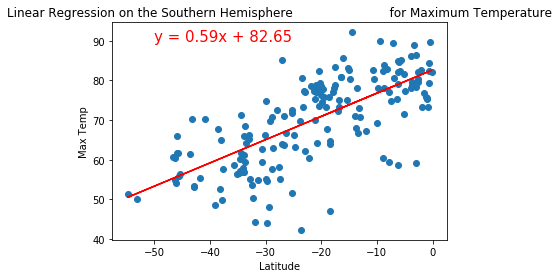

In [34]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

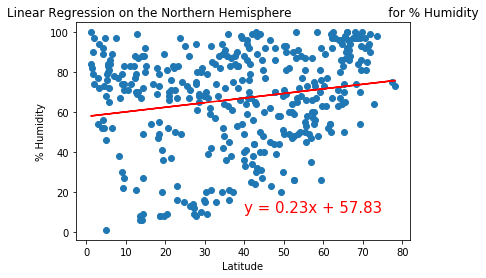

In [35]:
# linear regression on the percent humidity for the Northern Hemisphere,

# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

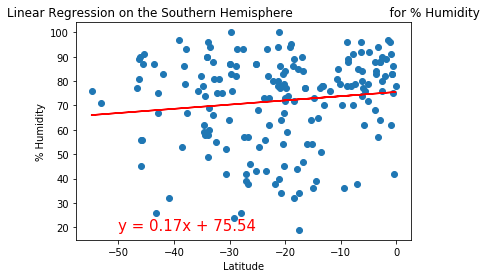

In [44]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,19))

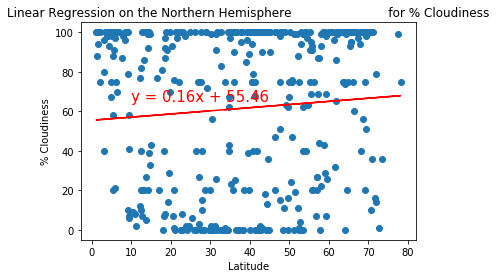

In [68]:
# Skill Drill Perform Linear Regression on the Percent Cloudiness for the Northern Hemisphere
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(10,65))

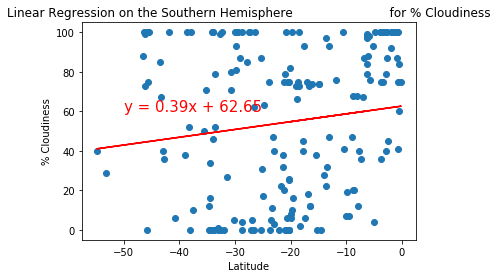

In [70]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

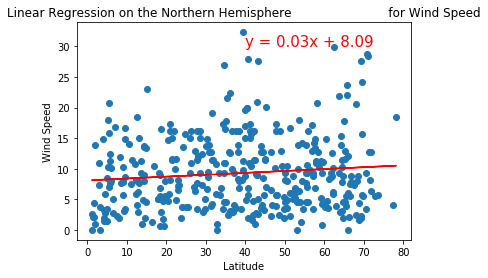

In [72]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,30))

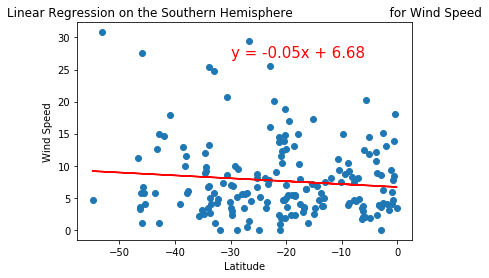

In [81]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-30,27))